In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD&bom=true&format=true&delimiter=%3B'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
import os
from urllib.request import urlretrieve
import pandas as pd


def get_fremont_data(filename='Fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(URL, 'Fremont.csv')
    data = pd.read_csv('Fremont.csv', delimiter=';', index_col='Date', parse_dates=True)
    data.columns = ['East', 'West']
    data['Total'] = data['East'] + data['West']
    return data
    

In [4]:
data = get_fremont_data()
data.head()

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


%matplotlib inline tells the notebook to put any plots in the note book itself instead of in separate windows
this plot uses all hourly data

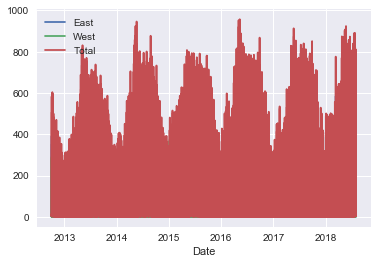

In [5]:
data.plot()

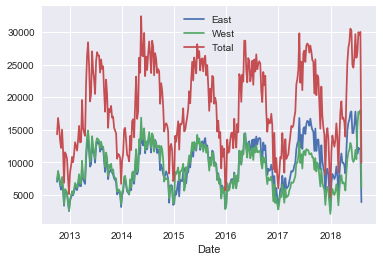

In [6]:

# to get total number of rides each week, resample weekly and sum
data.resample('W').sum().plot()

cell below changes the plot style from default
otherwise, same plo as before

let's rename the columns so that the legend is less verbose 
make sure names of columns matches order of legend (i believe pandas sors column names when creating a dataframe if columns not specified
semicolon used to prevent text representation appearing above the plot. if semicolon not used, we get something similar to 
"<matplotlib.axes._subplots.AxesSubplot at 0x1dbd6ea90b8" above the plot

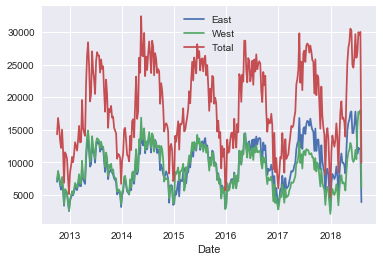

In [7]:
data.resample('W').sum().plot();


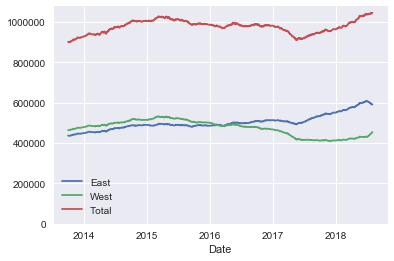

In [8]:


ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None);


look at average number of trips by time of day
result below shows that there are likely people going into the city in the morning using west sidewalk and leaving using the east sidewalk (note how West has a higher peak in morning and the East has a higher peak in the afternoon.

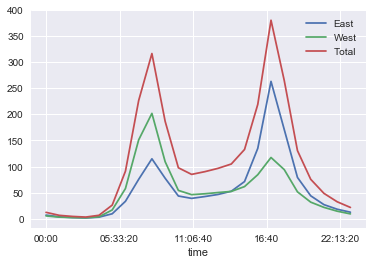

In [9]:
data.groupby(data.index.time).mean().plot();

let's look at the entire dataset using a pivot table. the columns will be dates and the rows will be hours of the day

In [10]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


Let's plot the pivoted data. Since we do not want a legend, set legend=False.
alpha is the transparency of the plot lines

the lines that have two peaks are likely to be work days and the days with a single hump are likely to be weekend days or holidays

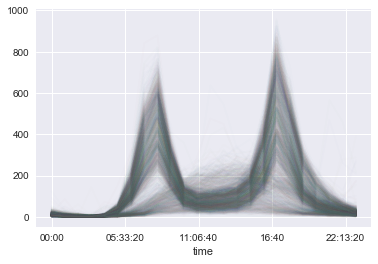

In [11]:
pivoted.plot(legend=False, alpha=0.01);